In [1]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import MultinomialNB

### 5.1 나이브 베이즈

파이썬에서는 사이킷런의 ***sklearn.naive_bayes.MultinomialNB***를 사용할 수 있다. 모델을 피팅하기 전에 범주형 피처들을 더미 변수로 변환해야 한다.

In [2]:
predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
loan_data = pd.read_csv('/Users/keemyohaan/Desktop/001.Python/004. Study/015. 데이터 과학을 위한 통계/practical-statistics-for-data-scientists/data/loan_data.csv')
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='')
y = loan_data[outcome]

naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model.fit(X,y)

MultinomialNB(alpha=0.01)

In [3]:
loan_data.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [4]:
X.head()

,credit_card,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,MORTGAGE,OWN,RENT,< 1 Year,> 1 Year
0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,1,0,1


In [5]:
y.head()

0    default
1    default
2    default
3    default
4    default
Name: outcome, dtype: object

feature_log_prob_ 속성을 사용하여 피팅된 모델에서 조건부확률을 유도할 수 있다.

모델을 통해 다음과 같이 새로운 대출에 대한 결과를 예측할 수 있다.

In [6]:
new_loan = X.loc[146:146, :]
new_loan.head()

,credit_card,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,MORTGAGE,OWN,RENT,< 1 Year,> 1 Year
146,0,0,0,0,0,0,1,1,0,0,0,1


In [7]:
X.head()

,credit_card,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,MORTGAGE,OWN,RENT,< 1 Year,> 1 Year
0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,1,0,1


scikit-learn의 분류모델에는 예측한 클래스를 반환하는 predict 메서드와 클래스 확률을 반환하는 predict_proba 메서드 두 가지가 있다.

In [8]:
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                            columns=loan_data[outcome].astype('category').cat.categories)
print('predicted probabilities', probabilities)

predicted class:  default
predicted probabilities     default  paid off
0  0.653696  0.346304


예측 결과에는 디폴트의 확률에 대한 posterior(사후) 추정도 함께 있다. 나이브 베이즈 분류기는 편향된 추정 결과를 예측하는 것으로 잘 알려져 있다.하지만 Y=1인 확률에 따라 레코드들에 순위를 매기는 것이 목적이므로 확률의 비편향된 추정치를 굳이 구할 필요가 없다면 나이브 베이즈도 나름 우수한 결과를 보인다.

### 5.1.3 수치형 예측 변수

베이즈 분류기는 예측변수들이 범주형인 경우(스팸 메일 분류에서 특정 단어, 어구, 문자열의 존재 여부 등)에 적합하다.\
수치형 변수에 나이브 베이즈 방법을 적용하기 위해서는 두가지 접근법 중 하나를 따라야 한다.

1. 수치형 예측변수를 비닝(binning)하여 범주형으로 변환한 뒤 알고리즘을 적용한다.
2. 조건부 확률 P(X_{j}|Y=i)를 추정하기 위해 정규분포(2.6절 참고) 같은 확률모형을 사용한다.

##### 주요개념
- 나이브 베이즈는 예측변수와 결과변수 모두 범주형(요인)이어야 한다.
- '각 출력 카테고리 안에서 어떤 예측변수의 카테고리가 가장 가능성이 높은가?'가 답하고자 하는 질문이다.
- 그리고 이 정보는 주어진 예측변수 값에 대해, 결과 카테고리의 확률을 추정하는 것으로 바뀐다.

# 5-2 판별 분석

판별분석(discriminant analysis)은 초창기 통계 분류 방법이다. 

##### 용어 정리
- 공분산(Covariance): 하나의 변수가 다른 변수와 함께 변화하는 정도(유사한 크기와 방향)를 측정하는 지표
- 판별함수(discriminant function): 예측변수에 적용했을 때 클래스 구분을 최대화 하는 함수
- 판별 가중치(discriminant weight):판별함수를 적용하여 얻은 점수를 말하며, 어떤 클래스에 속할 확률을 추정하는데 사용된다.

판별분석에는 여러 가지 기법이 있지만 그 가운데 가장 일반적으로 사용되는 것은 $선형판별분석^{linear discriminant Analysis}(LDA)$와 약간 다르지만 동작하는 원리는 본질적으로 같다. 트리 모델이나 로지스틱 회귀와 같은 더 정교한 기법이 출현한 이후로는 LDA는 그렇게 많이 사용하지 않는다.

하지만 여전히 일부 응용 분야에서는 LDA를 사용하고 있으며, 주성분분석과 같이 아직도 많이 사용되는 다른 방법들과도 연결된다.


### 5-2-1. 공분산행렬

판별분석을 이해하려면 두 개 이상의 변수 사이에 공분산이라는 개념을 먼저 도입해야 한다.\
공분산이란 두 변수 x와 z사이의 관계를 의미하는 지표이다 $\hat{x}와 \hat{z}$는 각 변수의 평균을 나타낸다.\
이 때 x와 z사이의 공분산 $s_{xz}$는 다음과 같다.

$S_{x,z} = \frac{\Sigma^{n}_{i=1}(x_{i}-\hat{x})(z_{i}-\hat{z})}{n-1}$

여기서 n은 레코드의 개수를 의미한다.\
상관계수 때와 마찬가지로 양수는 양의 관계를 음수는 음의 관계를 나타낸다. 하지만 상관관계가 -1에서 1사이에서 정의됐다면, 공분산의 척도는 변수 x와 z에서 사용하는 척도에 따라 달라진다.\

x와 z에 대한 공분산행렬 $\Sigma$는 각 변수의 분산 $s_{x}^{2}과 s^{2}_{z}$을 대각원소로 놓고 변수들 사이의 공분산을 비대각원소에 위치시킨 행렬이다.

### 5-2-2 피셔의 선형 반별

간단한 설명을 위해 두 개의 연속형 변수 (x,z)를 사용하여 이진 결과 변수 y를 예측하려는 분류 문제가 있다고 하자\
기술적으로 판별분석은 보통 예측변수가 정규분포를 따르는 연속적인 변수라는 가정이 있지만, 실제로는 정규분포에서 벗어나거나 이진 예측변수에 대해서도 잘 동작한다. 

피셔의 선형판별은 그룹 안의 편차와 다른 그룹 간의 편차를 구분한다. 구체적으로 레코드를 두 그룹으로 나누는 방법을 찾기 위해 선형판별분석(LDA)은 '내부'제곱합 $SS_{내부}$(그룹 안의 변동을 측정)에 대한 '사이'제곱합 $SS_{사이}$ (두 그룹 사이의 편차를 측정)의 비율을 최대화하는 것을 목표로 한다. 

### 5-2-3 간단한예

베너블스와 레플리가 저술한 $Modern Applied Statisics With S1(Springer, 1994)$

파이썬에서는 sklearn.discriminant_anlysis의 LinearDiscriminantAnalysis를 사용할 수 있다. Scaling_Property은 추정 가중치 제공

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
file_path = '/Users/keemyohaan/Desktop/001.Python/004. Study/003.Practical_Statistics/data_in'
loan3000 = pd.read_csv(file_path+'/loan3000.csv')

loan3000.outcome = loan3000.outcome.astype('category')
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X,y)

pd.DataFrame(loan_lda.scalings_, index=X.columns)

,0
borrower_score,7.175839
payment_inc_ratio,-0.099676


##### NOTE 특징 선택에 판별분석 사용하기
LDA를 돌리기 전에 미리 예측변수들을 정규화했다면, 판별자 가중치는 변수의 중요도를 의미하게 된다.\
따라서 특징 선택을 위해 계산상으로 효과적인 방법이다.

lda 함수를 이용해 다음과 같이 $상환^{paid off}$과 연체에 대한 확률을 계산할 수 있다.

In [30]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]), columns = loan_lda.classes_)
pred.head()

,default,paid off
0,0.553544,0.446456
1,0.558953,0.441047
2,0.272696,0.727304
3,0.506254,0.493746
4,0.609952,0.390048


피팅된 모델의 preict_proba 메서드는 default(연체) 혹은 paid off(상환)에 대한 확률을 반환한다.

예측에 대한 결과를 시각화해서 볼 수 있다면 LDA가 잘 동작하는지 쉽게 알 수 있을 것이다.\
predict 함수의 출력값을 사용하여. 다음과 같이 체납에 대한 확률값을 그래프로 시각화 할 수 있다.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

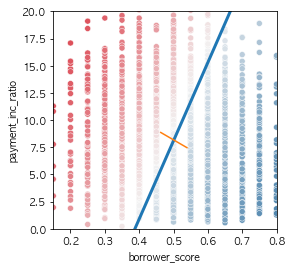

In [49]:
# 스케일링 계수와 평균값의 중간값을 이용해 결정 경계를 구한다.
center = np.mean(loan_lda.means_, axis=0)
slope = -loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

# payment_inc_ratio가 0 또는 20이 되는 borrower_score 값을 구한다.
x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000,pred['default']],axis=1)
lda_df.head()

fig, ax = plt.subplots(figsize=(4,4))
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio', 
                    hue = 'default', data=lda_df,
                   palette=sns.diverging_palette(240,10, n=9, as_cmap=True),
                   ax=ax, legend=False)

ax.set_ylim(0,20)
ax.set_xlim(0.15, 0.8)
ax.plot((x_0, x_20), (0, 20), linewidth=3)
ax.plot(*loan_lda.means_.transpose())
plt.show()

In [37]:
##### 판별분석의 확장
먼저 예측변수가 더 많아질 경우다. 지금까지 예제에서는 예측변수가 두 개인 경우에 대해서만 이야기했지만 

array([4.66230812, 4.00213321])